# Harmonic Oscilator

$$
\ddot{x} +\frac{c}{m}\dot{x} +\frac{k}{m}x = 0
$$

m := mass

k := sping constant

c := friction coefficient


In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def solve_harmonic(m, k, c = 0, x0=5, v0=0, span=[0,10]):
    
    def harmonic(t, q):
        return [q[1], -k*q[0]/m - c*q[1]/m]
    
    return solve_ivp(harmonic, span, [x0, v0], dense_output=True)



In [3]:
m = 1
k = 1
c = 0
x0 = 2.
v0 = 0.
span = [0,15]

solution = solve_harmonic(m,k,c,x0,v0,span)

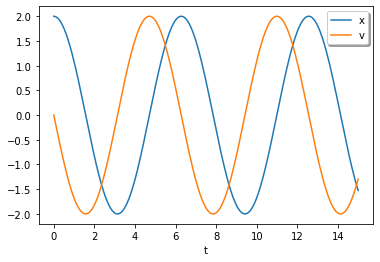

In [4]:
t = np.linspace(0, 15, 300)
z = solution.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'v'], shadow=True)

Text(0.5, 1.0, 'Harmonic Oscilator - Phase Space')

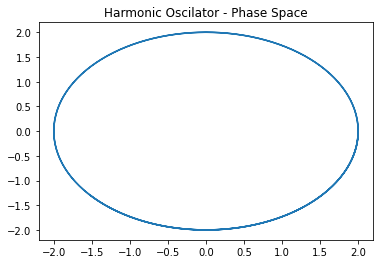

In [5]:
plt.plot(z[0], z[1])
plt.title('Harmonic Oscilator - Phase Space')

In [6]:
c = 0.5
solution = solve_harmonic(m,k,c,x0,v0,span)

Text(0.5, 1.0, 'Damped Harmonic Oscilator')

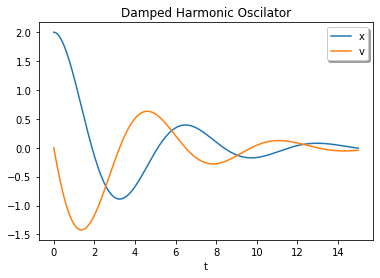

In [7]:
t = np.linspace(0, 15, 300)
z = solution.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'v'], shadow=True)
plt.title('Damped Harmonic Oscilator')

Text(0.5, 1.0, 'Dampled Harmonic Oscilator - Phase Space')

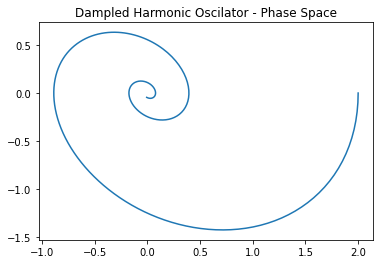

In [8]:
plt.plot(z[0], z[1])
plt.title('Dampled Harmonic Oscilator - Phase Space')

# Projectile Motion

$
m \dot{v_x} = 0\\
m \dot{v_y} = -mgy
$

m := mass

g := Gravitational acceleration near earth


In [9]:
g = 9.81  # Acceleration due to gravity (m/s^2)

In [10]:
def exact_solution(v0, phi):
    """
    :param v0: initial velocity magnitude
    :param phi: initial angle
    :return: 
    """
    impact_time = 2 * v0 * np.sin(phi) / g
    t = np.linspace(0, impact_time, 1000)
    x = v0 * np.cos(phi) * t
    y = v0 * np.sin(phi) * t - (g * t ** 2) / 2
    return x, y

In [11]:
x, y = exact_solution(10, np.pi/6)

Text(0.5, 1.0, 'Projectile with no air resistance')

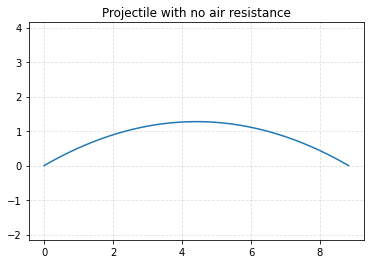

In [12]:
plt.plot(x,y)
plt.grid(alpha=.4, linestyle='--')
plt.axis('equal')
plt.ylim(0, 2)
plt.title('Projectile with no air resistance')

## With air resistance (Newton drag)

$
m \dot{v_x} = -k|v|v_x\\
m \dot{v_y} = -mgy - k|v|v_y
$
where
$ |v| = \sqrt{v_x^2 + v_y^2} $

In [13]:
# Drag calculation
rho_air = 1.29  # Air density (kg/m^3)
m = 0.16  # Mass of projectile (kg)
cD = 0.5  # Drag coefficient (spherical projectile)
r = 0.0366  # Radius of projectile (m)
k = 0.5 * cD * (np.pi * r ** 2) * rho_air / m

In [14]:
from scipy.integrate import odeint

def solve_projectile(init):
    def func(vec, _):
        vx, vy = vec[2], vec[3]
        # time derivative of the whole vector vec
        v = np.sqrt(vx ** 2 + vy ** 2)
        return [vx, vy, -k * v * vx, -g - k * v * vy]

    # impact of the resistance-free projectile motion
    impact_time = 2 * init[3] / g
    solution = odeint(func, init,
                      np.linspace(0, impact_time, 1000))
    return solution

In [15]:
# Launch properties
v0 = 50  # Initial velocity (m/s)
phi = np.pi / 4  # Launch angle (deg.)
initial_conditions = [0, 0, v0 * np.cos(phi), v0 * np.sin(phi)]
solution = solve_projectile(initial_conditions) 
xt, yt = solution[:, 0], solution[:, 1]

In [16]:
def find_last_positive_index(vl):
    for i in range(len(vl)):
        if vl[i + 1] < 0:
            return i
    return -1


In [17]:
index = find_last_positive_index(yt)
yt = yt[0:index]
xt = xt[0:index]

Text(0.5, 1.0, 'Projectile with Newton drag')

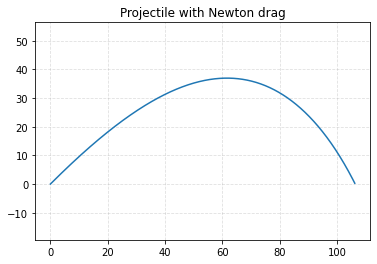

In [18]:
plt.plot(xt,yt)
plt.grid(alpha=.4, linestyle='--')
plt.axis('equal')
plt.title('Projectile with Newton drag')